## 2-1. Feature Selection Using Filter Method

### A. Import Python libraries

In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
from feature_selection import filter_method as ft
from matplotlib import pyplot as plt
import csv

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif
from sklearn.feature_selection import f_regression, mutual_info_regression

import warnings

warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning, )
%matplotlib inline

### B. Set City Name and Import City Data

In [2]:
# set city name
city_data = "1_goyang_city.xlsx"
CITY_NAME_Eng = "GoYang-City"

In [3]:
# Read excel file using pandas
df = pd.read_excel(open(f"../../data/{city_data}", 'rb'), sheet_name="training", header=4, index_col=0)
# Remove unnecessary columns for this analysis
df = df.iloc[2:]
# Change Date Format and Set Date as index
df.index = pd.to_datetime(df.index.str.strip(), format='%Y-%m')
df.index.name = "date"
# Change data format from "Object" to "Float"
df["water_supply"] = df.water_supply.astype(float)
df["Total_Population"] = df.Total_Population.astype(float)
# Delete unnecessary columns 
df.drop(columns=df.columns[19:21], inplace=True)
df.drop(columns=df.columns[22:23], inplace=True)
# Select clean data
df = df.loc["2010-01-01":]
df

,water_supply,Total_Population,Households,Population_per_Households,Male_Population,Female_Population,Male_Female_Ratio,Population_aging_Ratio,Power_usage,Num_of_Business,...,personal_expense,benefits_vs_personal_expense,employment_ratio,employment_insurance_ratio,Average_Temp,Monthly_Rainfall,Average_Relative_Humadity,Ground_Temp,Average_Wind,Average_Pressure
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,282265.709677,939497.0,353741.0,2.655889,463878.0,475619.0,0.975314,0.088,434436000.0,20326.0,...,104371555.0,0.191,99001.0,0.105377,-4.5,29.3,0.65,-1.2,2.3,1013.6
2010-02-01,273685.892857,940639.0,354266.0,2.655177,464518.0,476121.0,0.975630,0.088,418156000.0,20685.0,...,104371555.0,0.191,99893.0,0.106197,1.4,55.3,0.59,1.4,2.4,1010.7
2010-03-01,269918.193548,940982.0,354003.0,2.658119,464740.0,476242.0,0.975848,0.088,346653000.0,20809.0,...,104371555.0,0.191,99678.0,0.105930,4.3,82.5,0.59,5.0,2.9,1009.6
2010-04-01,274462.700000,941737.0,354192.0,2.658832,465148.0,476589.0,0.975994,0.088,356701000.0,21857.0,...,104371555.0,0.191,101594.0,0.107879,9.5,62.8,0.54,10.8,2.9,1007.4
2010-05-01,288537.806452,941724.0,354157.0,2.659058,465110.0,476614.0,0.975863,0.089,313793000.0,21739.0,...,104371555.0,0.191,102073.0,0.108390,17.2,124.0,0.62,18.7,2.6,1000.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,354382.451613,1080896.0,454793.0,2.376677,528972.0,551924.0,0.958415,0.140,487867544.0,46416.0,...,218316665.0,0.293,171845.0,0.158984,25.9,211.2,0.74,28.2,2.1,998.6
2021-09-01,343537.800000,1080787.0,455501.0,2.372743,528911.0,551876.0,0.958387,0.141,401433572.0,45514.0,...,218316665.0,0.293,172771.0,0.159857,22.6,131.0,0.71,24.6,2.3,1003.4
2021-10-01,340126.806452,1080240.0,455845.0,2.369753,528683.0,551557.0,0.958528,0.142,358286760.0,45839.0,...,218316665.0,0.293,173486.0,0.160599,15.6,57.0,0.70,16.7,2.1,1011.0


### C. Filter Methods

* Split Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['water_supply'], axis=1),
    df['water_supply'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((115, 24), (29, 24))

#### 1) Variance method
removing features that show the same value for the majority/all of the observations (constant/quasi-constant features)

In [5]:
# the original dataset has no constant variable
quasi_constant_feature = ft.constant_feature_detect(data=X_train, threshold=0.9)
quasi_constant_feature

1  variables are found to be almost constant


['complex_area']

In [6]:
X_train.columns

Index(['Total_Population', 'Households', 'Population_per_Households',
       'Male_Population', 'Female_Population', 'Male_Female_Ratio',
       'Population_aging_Ratio', 'Power_usage', 'Num_of_Business',
       'Business_above_100', 'complex_area', 'annual_household_income',
       'High_School_Graduate_num', 'High_School_Graduate_ratio',
       'personal_expense', 'benefits_vs_personal_expense', 'employment_ratio',
       'employment_insurance_ratio', 'Average_Temp', 'Monthly_Rainfall',
       'Average_Relative_Humadity', 'Ground_Temp', 'Average_Wind',
       'Average_Pressure'],
      dtype='object')

#### 2) Mutual Information Filter
Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

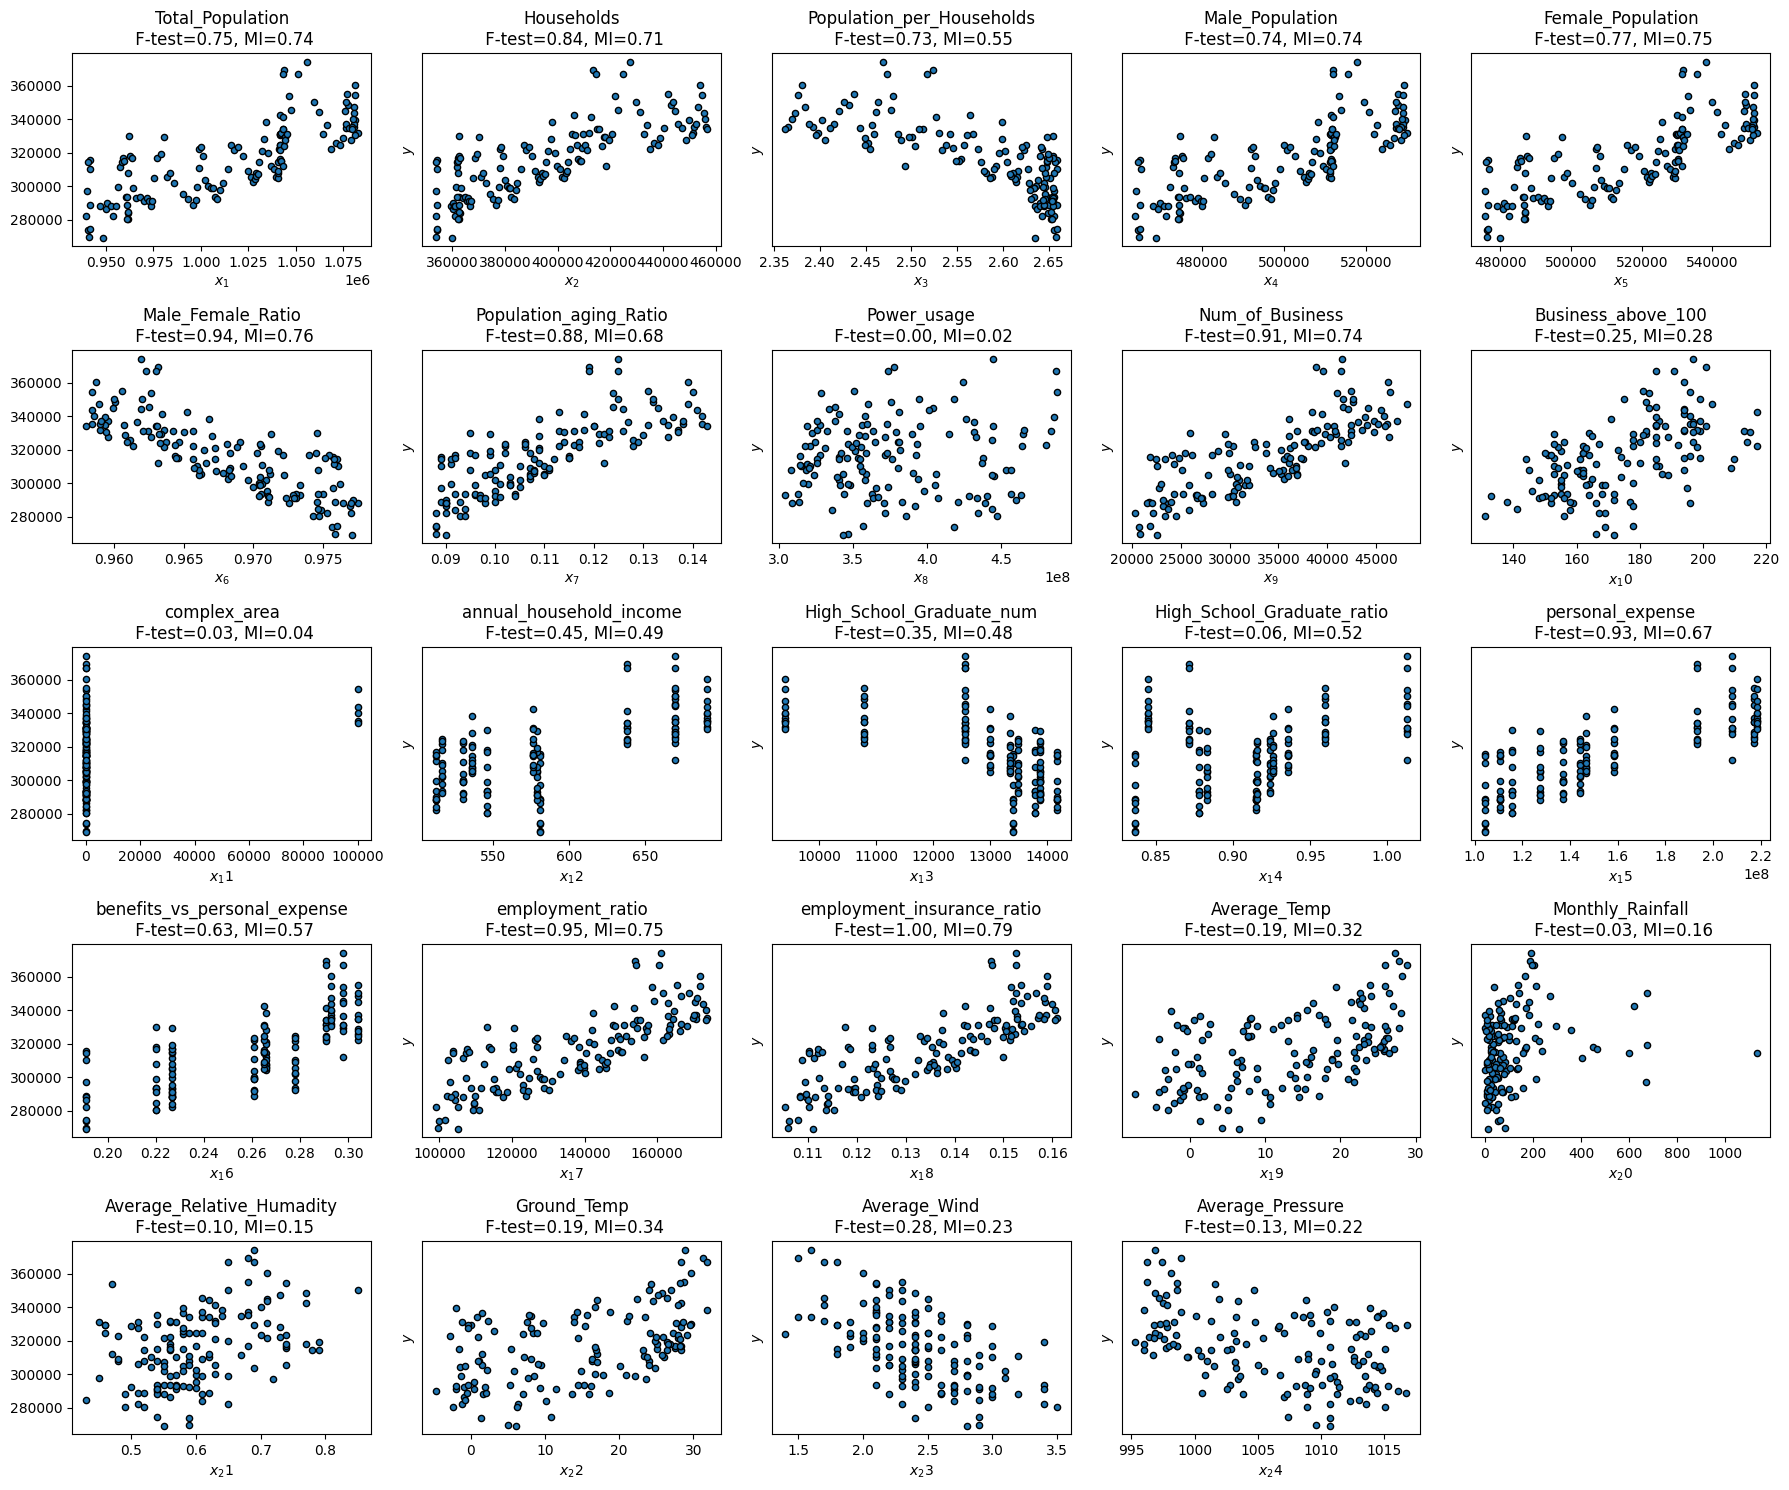

In [7]:
folder_name = "figures"

X = df.drop(columns=['water_supply'])
y = df.water_supply

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(18, 15))
for i in range(24):
    plt.subplot(5, 5, i + 1)
    plt.scatter(X[X.columns[i]].values, y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=10)
    num = [1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19,21,22,23,24]
    for j in num:
        if i == j: # or 5 or 10 or 15 or 20:
            plt.ylabel("$y$", fontsize=10)
            plt.yticks([])
    #else:
    #    plt.ylabel("")
    #plt.xticks([])
    plt.title("{}\n F-test={:.2f}, MI={:.2f}".format(X.columns[i], f_test[i], mi[i]), fontsize=12)
plt.tight_layout()
plt.savefig(f"./{folder_name}/{CITY_NAME_Eng}_mutual_information.png", bbox_inches='tight')
plt.show()

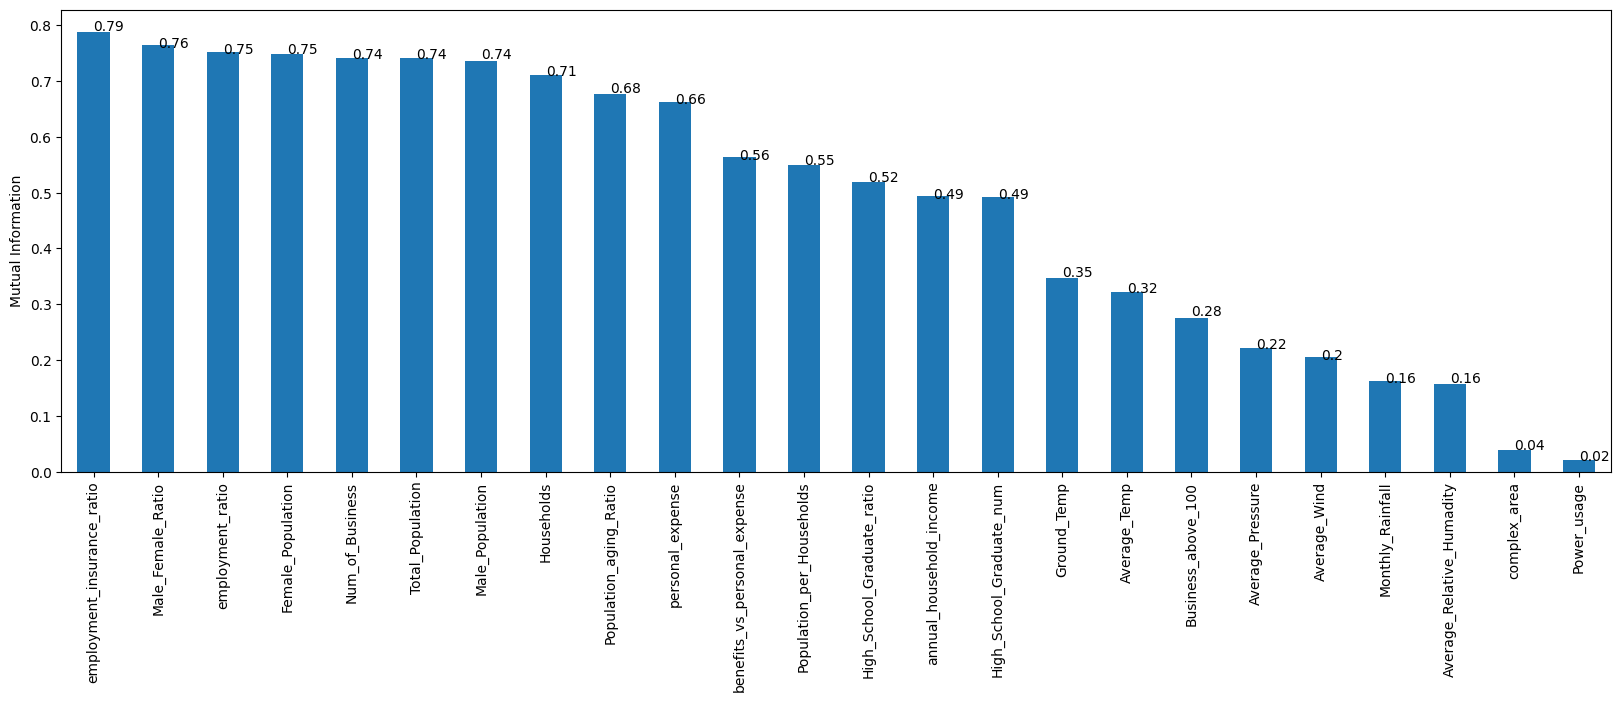

In [8]:
# determine the mutual information
mi = mutual_info_regression(X, y)
#mi /= np.max(mi)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
as_mi = mi.sort_values(ascending=False)
addlabels(as_mi.index, np.around(as_mi.values, 2))

plt.ylabel('Mutual Information')
plt.savefig(f"./{folder_name}/{CITY_NAME_Eng}_mutual_information_ranking.png", bbox_inches='tight')

In [9]:
# Select the features in the top percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=20).fit(X, y)

# display the features
X_train.columns[sel_.get_support()]

Index(['Female_Population', 'Male_Female_Ratio', 'Num_of_Business',
       'employment_ratio', 'employment_insurance_ratio'],
      dtype='object')

In [10]:
results = pd.DataFrame()
results["variance_method"] = [list(X_train.columns.values)]
results["mutual_information_method"] = [list(X_train.columns[sel_.get_support()].values)]
results.to_csv(f'./results/{CITY_NAME_Eng}_filter_results.csv')
results

,variance_method,mutual_information_method
0,"[Total_Population, Households, Population_per_...","[Female_Population, Male_Female_Ratio, Num_of_..."
